# **Лабораторная работа №2. EDA (исследовательский анализ данных)**

**ЦЕЛЬ ПРОЕКТА:** обработка данных, анализ и определение факторов, влияющих на оценку фильма

**ЗАДАНИЕ.**

Выполнить предварительную обработку данных в файле DataSet2.csv, затем реалиоватье основные техники EDA (представленные в данном примере проекта по EDA), сопровождая полученные данные соответствующими выводами.

# 1. Инициализация проекта

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
pd.set_option("display.max.columns", None)

In [3]:
data = pd.read_csv("../data/DataSet2.csv")

# 2. Исследование исходных данных

Датасет содержит следующие поля:

- `Unnamed: 0` - Индексация
- `Film` - Фильм
- `Oscar Year` - Год получения премии Оскар
- `Film Studio/Producer(s)` - Киностудия/продюсеры
- `Award` - Награда
- `Year of Release` - Год выпуска
- `Movie Time` - Длительность фильма
- `Movie Genre` - Жанр фильма
- `IMDB Rating` - Рейтинг IMDB
- `IMDB Votes` - Голоса IMDB
- `Movie Info` - Информация о фильме
- `Genres` - Жанры
- `Critic Consensus` - Общая рецензия критиков о фильме
- `Content Rating` - Рейтинг контента
- `Directors` - Режиссеры
- `Authors` - Авторы
- `Actors` - Актеры
- `Original Release Date` - Дата оригинального релиза
- `Streaming Release Date` - Дата релиза на стриминговых сервисах
- `Production Company` - Производственная компания
- `Tomatometer Status` - Статус томатометра
- `Tomatometer Rating` - Томатометр Рейтинг
- `Tomatometer Count` - Количество томатометров
- `Audience Status` - Статус аудитории
- `Audience Rating` - Рейтинг аудитории
- `Audience Count` - Количество зрителей
- `Tomatometer Top Critics Count` - Количество лучших критиков томатометра
- `Tomatometer Fresh Critics Count` - Количество свежих критиков томатометра
- `Tomatometer Rotten Critics Count` - Количество гнилых критиков томатометра
- `Film ID` - Идентификатор фильма

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        438 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic C

In [5]:
data.head()

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,Genres,Critic Consensus,Content Rating,Directors,Authors,Actors,Original Release Date,Streaming Release Date,Production Company,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221","With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890","Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason","Anita Page, Bessie Love, Charles King, Jed Pro...",1929-02-01,2017-02-25,MGM Home Entertainment,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98


**Получили следующую характеристику исходных данных:**

- 19/28 столбцов с примерно одинаковым количеством отсутствующих значений;
- Столбец 'Critic Consensus' содержит меньше всего пропущенных значений, вероятно, данные об рецензии критиков об этом фильме неизвестна, поэтому заполним их 'unknown';
- Тип данных столбцов 'Tomatometer Rating', 'Tomatometer Count', 'Audience Rating', 'Audience Count', 'Tomatometer Top Critics Count', 'Tomatometer Fresh Critics Count', 'Tomatometer Rotten Critics Count', 'Film ID' нужно перевести с float на int;
- Тип данных столбца 'IMDB Votes' нужно перевести в int;
- Тип данных столбцов 'Original Release Date', 'Streaming Release Date' изменить на тип дата.

# 3. Выводы и дальнейшие шаги

Вывод *описательной статистики* для кадра данных pandas.

In [6]:
data.describe()

,Unnamed: 0,Year of Release,Movie Time,IMDB Rating,Tomatometer Rating,Tomatometer Count,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
count,571.000000,571.000000,571.000000,571.000000,439.000000,439.000000,439.000000,4.390000e+02,439.000000,439.000000,439.000000
mean,285.000000,1973.357268,124.894921,7.570403,87.503417,110.697039,82.428246,5.154145e+05,21.861048,98.471526,12.275626
std,164.977776,29.315738,26.322817,0.559652,11.690622,119.541406,10.927897,3.623107e+06,21.615492,107.798554,19.310232
min,0.000000,1927.000000,66.000000,5.600000,29.000000,5.000000,21.000000,6.000000e+00,0.000000,3.000000,0.000000
25%,142.500000,1944.000000,107.000000,7.300000,84.000000,25.000000,78.000000,6.637500e+03,5.000000,21.500000,2.000000
50%,285.000000,1972.000000,121.000000,7.600000,91.000000,54.000000,85.000000,3.716600e+04,11.000000,49.000000,5.000000
75%,427.500000,2001.000000,136.500000,7.900000,95.000000,199.000000,90.000000,1.255365e+05,45.000000,163.500000,15.000000
max,570.000000,2021.000000,238.000000,9.300000,100.000000,574.000000,98.000000,3.579764e+07,69.000000,495.000000,182.000000


## 3.0. Удаление ненужных столбцов

In [7]:
data.pop('Unnamed: 0')

0        0
1        1
2        2
3        3
4        4
      ... 
566    566
567    567
568    568
569    569
570    570
Name: Unnamed: 0, Length: 571, dtype: int64

In [8]:
data.head(5)

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,Genres,Critic Consensus,Content Rating,Directors,Authors,Actors,Original Release Date,Streaming Release Date,Production Company,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221","With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890","Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason","Anita Page, Bessie Love, Charles King, Jed Pro...",1929-02-01,2017-02-25,MGM Home Entertainment,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98


## 3.1. Обработка пропущенных значений

In [9]:
# Проверка на наличие пропущенных значений
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Critic Consensus                    40.630473
Audience Status                     23.642732
Authors                             23.467601
Directors                           23.467601
Streaming Release Date              23.292469
Movie Info                          23.292469
Audience Rating                     23.117338
Audience Count                      23.117338
Tomatometer Count                   23.117338
Tomatometer Status                  23.117338
Genres                              23.117338
Tomatometer Top Critics Count       23.117338
Content Rating                      23.117338
Tomatometer Fresh Critics Count     23.117338
Tomatometer Rating                  23.117338
Actors                              23.117338
Original Release Date               23.117338
Tomatometer Rotten Critics Count    23.117338
Production Company                  23.117338
Film                                 0.000000
Oscar Year                           0.000000
IMDB Votes                        

**Недостающие значения данных в следующих столбцах:**

- `Movie Info` - Информация о фильме
- `Genres` - Жанры
- `Critic Consensus` - Общая рецензия критиков о фильме
- `Content Rating` - Рейтинг контента
- `Directors` - Режиссеры
- `Authors` - Авторы
- `Actors` - Актеры
- `Original Release Date` - Дата оригинального релиза
середина года 
- `Streaming Release Date` - Дата релиза на стриминговых сервисах
- `Production Company` - Производственная компания
- `Tomatometer Status` - Статус томатометра
- `Tomatometer Rating` - Томатометр Рейтинг
- `Tomatometer Count` - Количество томатометров
- `Audience Status` - Статус аудитории
- `Audience Rating` - Рейтинг аудитории
- `Audience Count` - Количество зрителей
- `Tomatometer Top Critics Count` - Количество лучших критиков томатометра
- `Tomatometer Fresh Critics Count` - Количество свежих критиков томатометра
- `Tomatometer Rotten Critics Count` - Количество гнилых критиков томатометра

**Предположения для заполнения пропущенного значения:**

- Заполнить столбцы 'Movie Info', 'Critic Consensus', 'Authors', 'Actors' значением 'Unknown', поскольку эти данные логически никак не связаны с остальными столбцами и их невозможно предугадать.
- Обработать пропущенные значения в столбце 'Production Company' наиболее встречающимся значением по киностудии (столбец 'Film Studio/Producer(s)')
- Обработать пропущенные значения в столбце 'Genres' наиболее встречающимся значением по столбцу 'Movie Genre'
- Обработать пропущенные значения в столбце режиссеров 'Directors' наиболее встречающимся значением по киностудии (столбец 'Film Studio/Producer(s)')
- Обработать пропущенные значения в столбце 'Content Rating', 'Tomatometer Status', 'Audience Status' наиболее встречающимся значениями по режиссеру (столбец 'Directors')

- Обработать пропущенные значения в столбцах 'Original Release Date', 'Streaming Release Date' средним значением по соответствующим столбцам;
- Остальные столбцы заполним на основе корреляции

In [10]:
columns_to_replace = ['Movie Info', 'Critic Consensus', 'Authors', 'Actors']
for column in columns_to_replace:
    data[column].fillna('Unknown', inplace = True)

In [11]:
f = lambda x: x.mode().iat[0] if x.notna().any() else 'Unknown'
group_prod_company = data.groupby('Film Studio/Producer(s)')['Production Company'].transform(f)
data ['Production Company'] = data ['Production Company'].fillna(group_prod_company)

In [12]:
group_genres = data.groupby('Movie Genre')['Genres'].transform(f)
data ['Genres'] = data ['Genres'].fillna(group_genres)

In [13]:
group_directors = data.groupby('Film Studio/Producer(s)')['Directors'].transform(f)
data['Directors'] = data['Directors'].fillna(group_directors)

In [14]:
group_content_rating = data.groupby('Directors')['Content Rating'].transform(f)
data['Content Rating'] = data['Content Rating'].fillna(group_content_rating)

In [15]:
group_tomato_status = data.groupby('Directors')['Tomatometer Status'].transform(f)
data['Tomatometer Status'] = data['Tomatometer Status'].fillna(group_tomato_status)

In [16]:
group_audience_status = data.groupby('Directors')['Audience Status'].transform(f)
data['Audience Status'] = data['Audience Status'].fillna(group_audience_status)

In [17]:
data['IMDB Votes'] = data['IMDB Votes'].apply(lambda x: x.replace(',','')).astype(int)

data ['Original Release Date'] = pd.to_datetime(data['Original Release Date'],format = '%Y-%m-%d')
data ['Streaming Release Date'] = pd.to_datetime(data['Streaming Release Date'],format = '%Y-%m-%d')

In [18]:
data['Original Release Date'] = data['Original Release Date'].fillna(data['Original Release Date'].mean())
data['Streaming Release Date'] = data['Streaming Release Date'].fillna(data['Streaming Release Date'].mean())

Оставшиеся пропуски в 5 столбцах будем заполнять на основе корреляции.

In [19]:
data.select_dtypes(include=np.number).corr()

,Year of Release,Movie Time,IMDB Rating,IMDB Votes,Tomatometer Rating,Tomatometer Count,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
Year of Release,1.000000,0.242018,0.329910,0.491480,0.034520,0.805810,0.238831,0.094606,0.847781,0.792311,0.567570
Movie Time,0.242018,1.000000,0.292357,0.280846,-0.188743,0.091782,0.145336,0.190135,0.114933,0.071951,0.166130
IMDB Rating,0.329910,0.292357,1.000000,0.599870,0.466360,0.268721,0.859044,0.171507,0.294503,0.279789,0.101679
IMDB Votes,0.491480,0.280846,0.599870,1.000000,0.102116,0.527580,0.346323,0.314796,0.577267,0.520346,0.362110
Tomatometer Rating,0.034520,-0.188743,0.466360,0.102116,1.000000,0.111996,0.506349,-0.007486,0.114217,0.184758,-0.337102
Tomatometer Count,0.805810,0.091782,0.268721,0.527580,0.111996,1.000000,0.157585,0.067923,0.943635,0.990934,0.662408
Audience Rating,0.238831,0.145336,0.859044,0.346323,0.506349,0.157585,1.000000,-0.014034,0.192354,0.175147,-0.002000
Audience Count,0.094606,0.190135,0.171507,0.314796,-0.007486,0.067923,-0.014034,1.000000,0.121112,0.063454,0.065931
Tomatometer Top Critics Count,0.847781,0.114933,0.294503,0.577267,0.114217,0.943635,0.192354,0.121112,1.000000,0.937991,0.608254
Tomatometer Fresh Critics Count,0.792311,0.071951,0.279789,0.520346,0.184758,0.990934,0.175147,0.063454,0.937991,1.000000,0.555764


<Axes: >

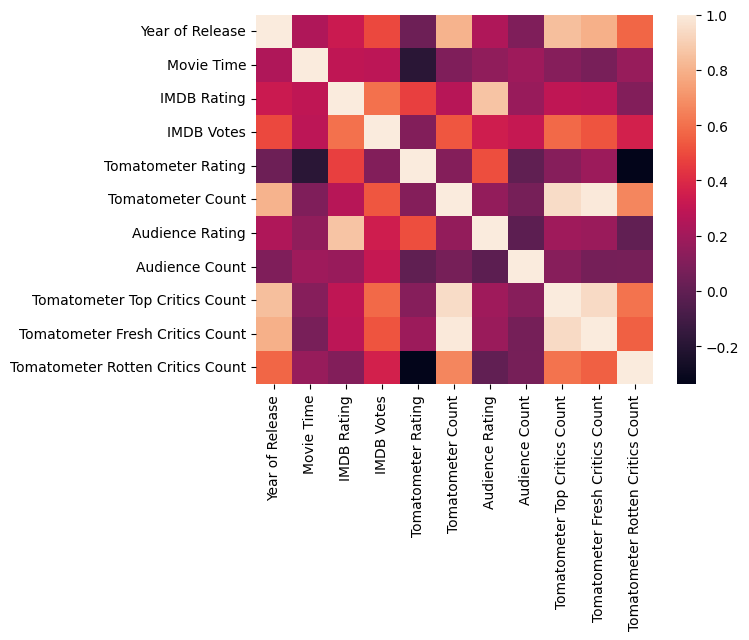

In [20]:
sns.heatmap(data.select_dtypes(include=np.number).corr())

Судя по тепловой карте зависимостей столбцы 'Tomatometer Rating' и 'Audience Count' совершенно, прям никак не хотят коррелировать с другими данными датафрейма. Значит, нам не остается ничего делать, кроме как заполнить их выбросами (-1) и медианным значением по году

Посмотрим данные об этих столбцах :

In [21]:
data.describe()[['Tomatometer Rating','Audience Count']]

,Tomatometer Rating,Audience Count
count,439.000000,4.390000e+02
mean,87.503417,5.154145e+05
min,29.000000,6.000000e+00
25%,84.000000,6.637500e+03
50%,91.000000,3.716600e+04
75%,95.000000,1.255365e+05
max,100.000000,3.579764e+07
std,11.690622,3.623107e+06


In [22]:
data.groupby('Year of Release')['Audience Count'].median()

Year of Release
1927     3530.0
1928      356.0
1929     1813.0
1930      323.0
1931     1065.5
         ...   
2017    24326.5
2018    10672.0
2019     1057.0
2020        NaN
2021        NaN
Name: Audience Count, Length: 95, dtype: float64

In [23]:
# data['Tomatometer Rating'] = data['Tomatometer Rating'].fillna(data['Tomatometer Rating'].mean())
data['Tomatometer Rating'] = data['Tomatometer Rating'].fillna(-1)

# data['Audience Count'] = data['Audience Count'].fillna(data['Audience Count'].median())
x =  lambda x: x.median() if x.notna().any() else data['Audience Count'].median()
group_aud_rating = data.groupby('Year of Release')['Audience Count'].transform(x)
data['Audience Count'] = data['Audience Count'].fillna(round(group_aud_rating))


Из тепловой карты зависимостей можно заметить, что сила связи столбцов рейтинга 'IMDB Rating' и 'Audience Rating' довольна высока и составляет 0.859044. Заполним пропущенные значения в столбце 'Audience Rating' на основе этой корреляции:

In [24]:
data.describe()[['IMDB Rating','Audience Rating']]

,IMDB Rating,Audience Rating
count,571.000000,439.000000
mean,7.570403,82.428246
min,5.600000,21.000000
25%,7.300000,78.000000
50%,7.600000,85.000000
75%,7.900000,90.000000
max,9.300000,98.000000
std,0.559652,10.927897


In [25]:
koef_aud_rating = data['Audience Rating'].mean()/data['IMDB Rating'].mean() # * data[['Audience Rating','IMDB Rating']].corr().iloc[0,1]
data['Audience Rating'] = data['Audience Rating'].fillna(data['IMDB Rating'].apply(lambda x: round(x*koef_aud_rating)))
data[['Audience Rating','IMDB Rating']]

,Audience Rating,IMDB Rating
0,78.0,7.5
1,84.0,7.7
2,73.0,6.7
3,21.0,5.7
4,63.0,5.8
...,...,...
566,75.0,6.9
567,82.0,7.5
568,82.0,7.5
569,85.0,7.8


Осталось заполнить пропущеннные значения в 4 столбцах. Заполним пропущенные значения столбца 'Tomatometer Count' 

In [26]:
data.describe()[['Tomatometer Count', 'Year of Release']]

,Tomatometer Count,Year of Release
count,439.000000,571.000000
mean,110.697039,1973.357268
min,5.000000,1927.000000
25%,25.000000,1944.000000
50%,54.000000,1972.000000
75%,199.000000,2001.000000
max,574.000000,2021.000000
std,119.541406,29.315738


In [27]:
data[['Tomatometer Count', 'Year of Release']].corr().iloc[0,1]

0.8058104115471918

In [28]:
f = lambda x: x.mean() if x.notna().any() else data['Tomatometer Count'].mean()
group_aud_rating = data.groupby('Year of Release')['Tomatometer Count'].transform(f)
data['Tomatometer Count'] = data['Tomatometer Count'].fillna(round(group_aud_rating))
data[['Tomatometer Count', 'Year of Release']]

,Tomatometer Count,Year of Release
0,46.0,1927
1,46.0,1927
2,9.0,1928
3,24.0,1929
4,24.0,1929
...,...,...
566,111.0,2020
567,111.0,2020
568,111.0,2020
569,465.0,2019


In [29]:
koef_top = data['Tomatometer Count'].median()/data['Tomatometer Top Critics Count'].mean()
data['Tomatometer Top Critics Count'] = data['Tomatometer Top Critics Count'].fillna(data['Tomatometer Count'].apply(lambda x: round(x/koef_top)))

koef_fresh = data['Tomatometer Count'].median()/data['Tomatometer Fresh Critics Count'].mean()
data['Tomatometer Fresh Critics Count'] = data['Tomatometer Fresh Critics Count'].fillna(data['Tomatometer Count'].apply(lambda x: round(x*koef_fresh)))

data['Tomatometer Rotten Critics Count'] = data['Tomatometer Rotten Critics Count'].fillna(data.apply(lambda x: x['Tomatometer Count'] - x['Tomatometer Fresh Critics Count'], axis = 1))

In [30]:
data[['Tomatometer Count', 'Tomatometer Top Critics Count', 'Tomatometer Fresh Critics Count', 'Tomatometer Rotten Critics Count']]

,Tomatometer Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
0,46.0,9.0,43.0,3.0
1,46.0,21.0,22.0,24.0
2,9.0,4.0,4.0,5.0
3,24.0,7.0,8.0,16.0
4,24.0,11.0,12.0,12.0
...,...,...,...,...
566,111.0,51.0,54.0,57.0
567,111.0,51.0,54.0,57.0
568,111.0,51.0,54.0,57.0
569,465.0,212.0,227.0,238.0


In [31]:
data.isna().sum()

Film                                0
Oscar Year                          0
Film Studio/Producer(s)             0
Award                               0
Year of Release                     0
Movie Time                          0
Movie Genre                         0
IMDB Rating                         0
IMDB Votes                          0
Movie Info                          0
Genres                              0
Critic Consensus                    0
Content Rating                      0
Directors                           0
Authors                             0
Actors                              0
Original Release Date               0
Streaming Release Date              0
Production Company                  0
Tomatometer Status                  0
Tomatometer Rating                  0
Tomatometer Count                   0
Audience Status                     0
Audience Rating                     0
Audience Count                      0
Tomatometer Top Critics Count       0
Tomatometer 

## 3.2. Коррекция типов данных

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Film                              571 non-null    object        
 1   Oscar Year                        571 non-null    object        
 2   Film Studio/Producer(s)           571 non-null    object        
 3   Award                             571 non-null    object        
 4   Year of Release                   571 non-null    int64         
 5   Movie Time                        571 non-null    int64         
 6   Movie Genre                       571 non-null    object        
 7   IMDB Rating                       571 non-null    float64       
 8   IMDB Votes                        571 non-null    int32         
 9   Movie Info                        571 non-null    object        
 10  Genres                            571 non-null    

In [33]:
# округлить все значения дат до полуночи
data['Original Release Date'] = data['Original Release Date'].apply(lambda x: x.normalize())
data['Streaming Release Date'] = data['Streaming Release Date'].apply(lambda x: x.normalize())
data[['Original Release Date', 'Streaming Release Date']]

,Original Release Date,Streaming Release Date
0,1927-08-12,2017-01-02
1,1976-07-17,2014-10-12
2,1976-07-17,2014-10-12
3,1929-02-01,2017-02-25
4,1976-07-17,2014-10-12
...,...,...
566,1976-07-17,2014-10-12
567,1976-07-17,2014-10-12
568,1976-07-17,2014-10-12
569,1976-07-17,2014-10-12


In [34]:
change_to_int = ['Tomatometer Rating', 'Tomatometer Count', 'Audience Rating', 'Audience Count',
       'Tomatometer Top Critics Count', 'Tomatometer Fresh Critics Count', 'Tomatometer Rotten Critics Count']
for column in change_to_int:
    data[column] = data[column].astype(int)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Film                              571 non-null    object        
 1   Oscar Year                        571 non-null    object        
 2   Film Studio/Producer(s)           571 non-null    object        
 3   Award                             571 non-null    object        
 4   Year of Release                   571 non-null    int64         
 5   Movie Time                        571 non-null    int64         
 6   Movie Genre                       571 non-null    object        
 7   IMDB Rating                       571 non-null    float64       
 8   IMDB Votes                        571 non-null    int32         
 9   Movie Info                        571 non-null    object        
 10  Genres                            571 non-null    

# EDA
## 4.1. Выделение и исследование основных характеристик фильмов

In [36]:
# все числовые столбцы
number_data = data.select_dtypes(include=np.number)

In [37]:
number_data.describe()

,Year of Release,Movie Time,IMDB Rating,IMDB Votes,Tomatometer Rating,Tomatometer Count,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
count,571.000000,571.000000,571.000000,5.710000e+02,571.000000,571.000000,571.000000,5.710000e+02,571.000000,571.000000,571.000000
mean,1973.357268,124.894921,7.570403,2.084804e+05,67.043783,105.602452,81.887916,4.083674e+05,26.166375,85.697023,19.943958
std,29.315738,26.322817,0.559652,3.423499e+05,38.724848,120.342951,10.229200,3.182531e+06,33.612946,101.418817,37.126862
min,1927.000000,66.000000,5.600000,1.800000e+01,-1.000000,5.000000,21.000000,6.000000e+00,0.000000,3.000000,0.000000
25%,1944.000000,107.000000,7.300000,9.660500e+03,57.500000,25.000000,77.000000,5.535500e+03,6.000000,17.000000,2.000000
50%,1972.000000,121.000000,7.600000,5.899600e+04,87.000000,48.000000,84.000000,3.054900e+04,13.000000,40.000000,9.000000
75%,2001.000000,136.500000,7.900000,2.594290e+05,94.000000,157.000000,89.000000,8.896800e+04,43.500000,125.000000,20.000000
max,2021.000000,238.000000,9.300000,2.452594e+06,100.000000,574.000000,98.000000,3.579764e+07,212.000000,495.000000,238.000000


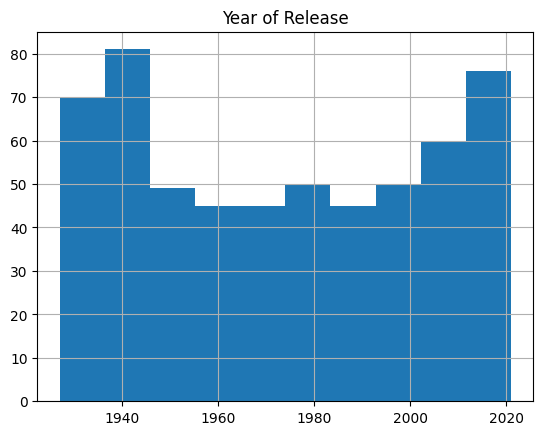

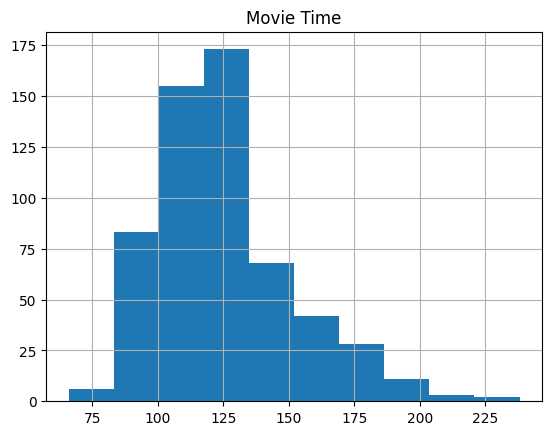

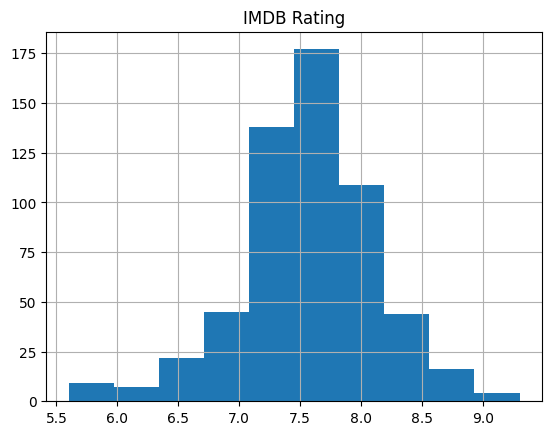

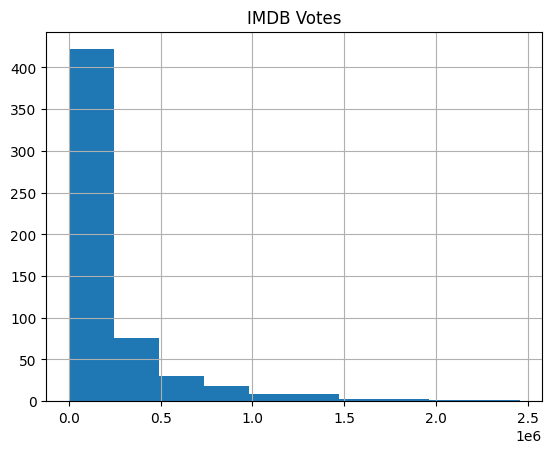

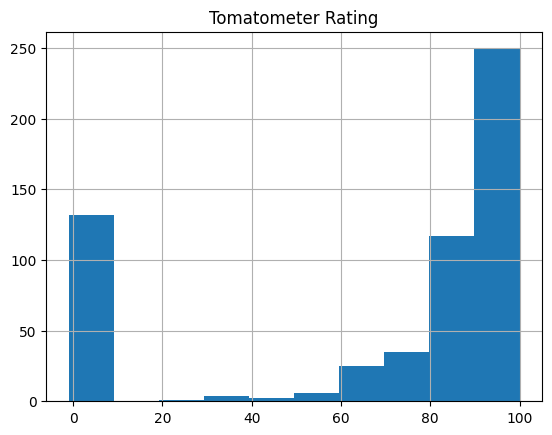

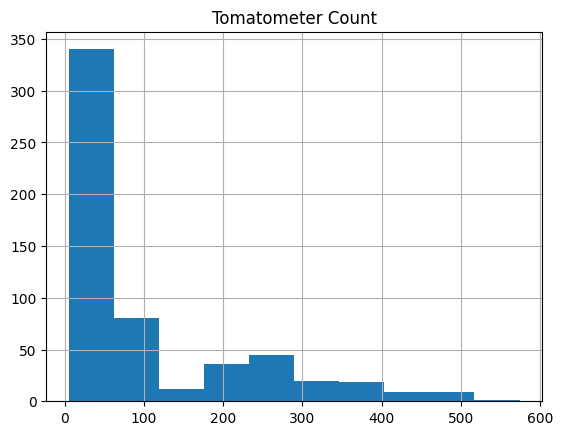

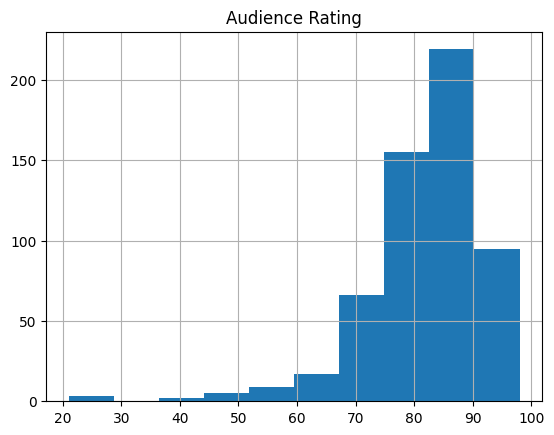

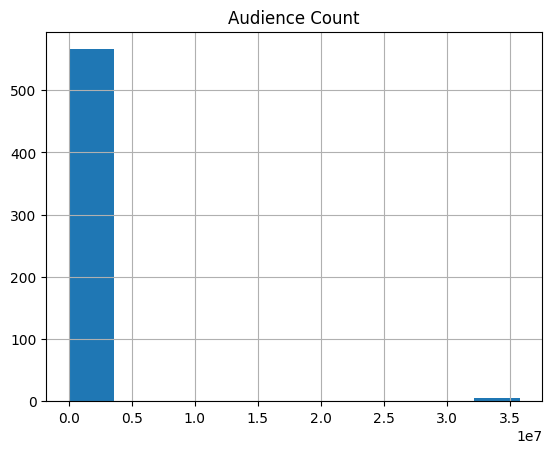

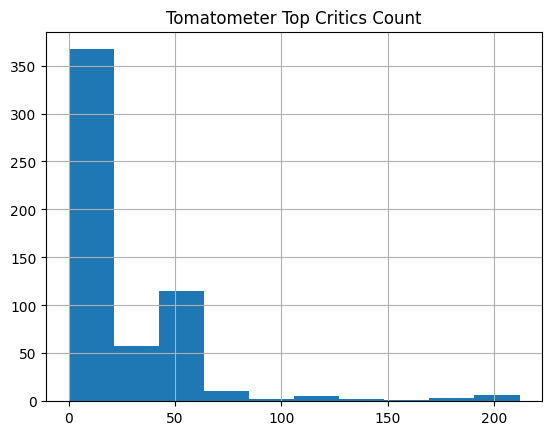

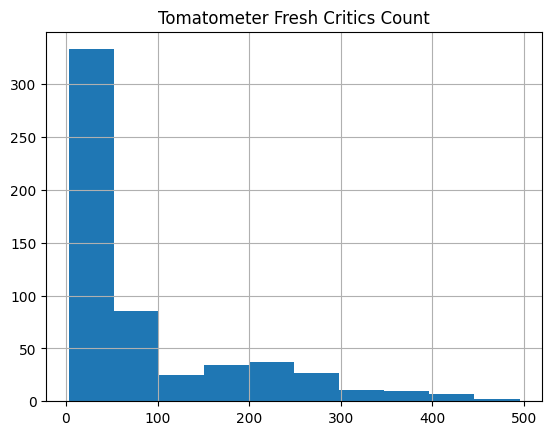

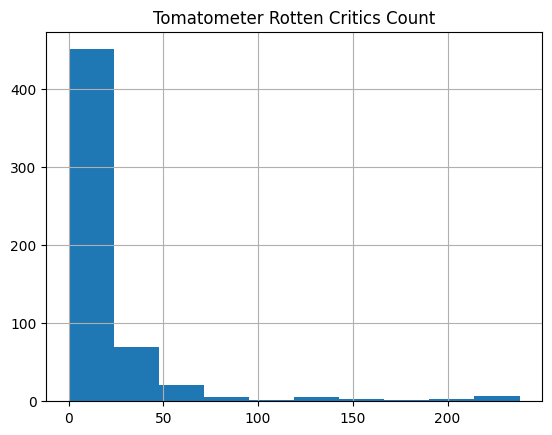

In [38]:
for column in number_data.columns:
    data.hist(column)

Из всех числовых характеристик для фильма выделим основные.

- `IMDB Rating` - Рейтинг IMDB
- `Tomatometer Rating` - Томатометр Рейтинг
- `Tomatometer Top Critics Count` - Количество томатометров
- `Audience Rating` - Рейтинг аудитории

На эти перечисленные параметры будет обращено особое внимание с помощью гистограмм. Здесь выбросы будут влиять на форму и читаемость гистограмм. Анализ столбцов с годом релиза кино-картины и ее длительности не представлет особого интереса для оценки фильма.

P.S. Число основных параметров по ходу работы возможно уменьшится

## 4.2. Изучение и обработка выбросов

In [39]:
outlier = data[['IMDB Rating', 'Tomatometer Rating', 'Tomatometer Top Critics Count', 'Audience Rating']]
outlier.head()

,IMDB Rating,Tomatometer Rating,Tomatometer Top Critics Count,Audience Rating
0,7.5,93,9,78
1,7.7,-1,21,84
2,6.7,-1,4,73
3,5.7,33,7,21
4,5.8,-1,11,63


In [40]:
# Определить нижние пределы для выбросов
Q1 = outlier.quantile(0.25)
Q1

IMDB Rating                       7.3
Tomatometer Rating               57.5
Tomatometer Top Critics Count     6.0
Audience Rating                  77.0
Name: 0.25, dtype: float64

In [41]:
# Определить верхние пределы выбросов
Q3 = outlier.quantile(0.75)
Q3

IMDB Rating                       7.9
Tomatometer Rating               94.0
Tomatometer Top Critics Count    43.5
Audience Rating                  89.0
Name: 0.75, dtype: float64

In [42]:
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
filtered_outlier = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_outlier

,IMDB Rating,Tomatometer Rating,Tomatometer Top Critics Count,Audience Rating
0,7.5,93,9,78
9,7.1,75,0,69
18,7.4,86,10,77
21,7.3,90,2,74
27,7.4,96,4,74
...,...,...,...,...
552,7.6,90,62,79
553,7.2,65,47,60
557,7.8,96,53,86
559,8.4,68,56,88


In [43]:
# Копирование индексов, чтобы потом посмотреть разницу представления данных без выбросов и с ними
index_list = list(filtered_outlier.index.values)

In [44]:
# Хранить данные без выбросов в отдельном DataFrame.
data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,Genres,Critic Consensus,Content Rating,Directors,Authors,Actors,Original Release Date,Streaming Release Date,Production Company,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93,46,Upright,78,3530,9,43,3,2becf7d5-a3de-46ab-ae45-abdd6b588067
9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,2079,"After being convicted of manslaughter, drunk d...","Classics, Drama",Unknown,NR,George W. Hill,"Frances Marion, Martin Flavin, Joseph Farnham,...","Wallace Beery, Robert Montgomery, Chester Morr...",1930-05-14,2012-04-16,Warner Bros.,Fresh,75,8,Upright,69,323,0,6,2,297aa285-29d7-4a22-b833-c5632ab3e562
18,Grand Hotel,1931/32,Metro-Goldwyn-Mayer,Winner,1932,112,"Drama,Romance",7.4,18314,"At a luxurious Berlin hotel between the wars, ...","Classics, Drama, Romance",Perhaps less a true film than a series of star...,NR,Edmund Goulding,William A. Drake,"Greta Garbo, John Barrymore, Joan Crawford, Wa...",1932-01-01,2016-12-20,MGM Home Entertainment,Certified-Fresh,86,42,Upright,77,7014,10,36,6,be69f946-6adc-47e4-8491-79d6c033f59d
21,The Champ,1931/32,Metro-Goldwyn-Mayer,Nominee,1931,86,"Drama,Sport",7.3,3003,Champ (Wallace Beery) is a down-on-his-luck bo...,"Classics, Drama, Kids & Family",Unknown,NR,King Vidor,"Frances Marion, Leonard Praskins, Wanda Tuchock","Wallace Beery, Jackie Cooper, Irene Rich, Rosc...",1931-11-21,2017-01-04,MGM,Fresh,90,10,Upright,74,617,2,9,1,c8994348-093e-4e22-8ffe-6ad3332a2bab
27,42nd Street,1932/33,Warner Bros.,Nominee,1933,89,"Comedy,Drama,Musical",7.4,11342,When revered Broadway director Julian Marsh (W...,Musical & Performing Arts,"Bubsy Berkeley does it again in 42nd Street, a...",NR,Lloyd Bacon,"Rian James, James Seymour, Whitney Bolton","Warner Baxter, Bebe Daniels, George Brent, Rub...",1933-03-09,2012-04-16,MGM Home Entertainment,Fresh,96,25,Upright,74,7561,4,24,1,1ad59370-1ed5-4d3a-a8c4-8571f95da168


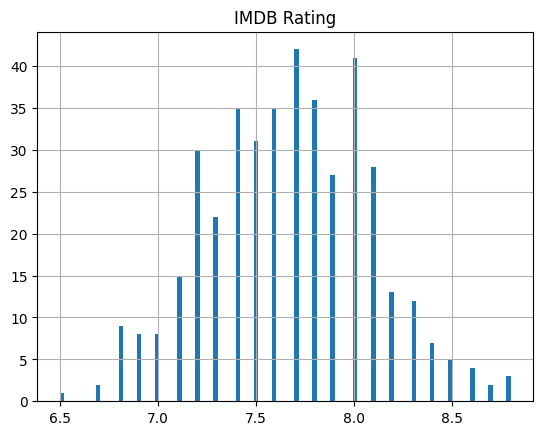

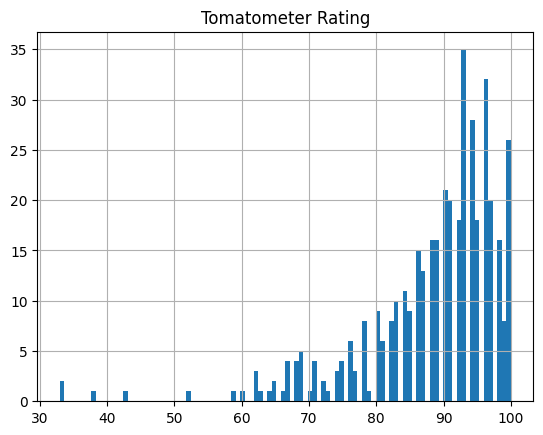

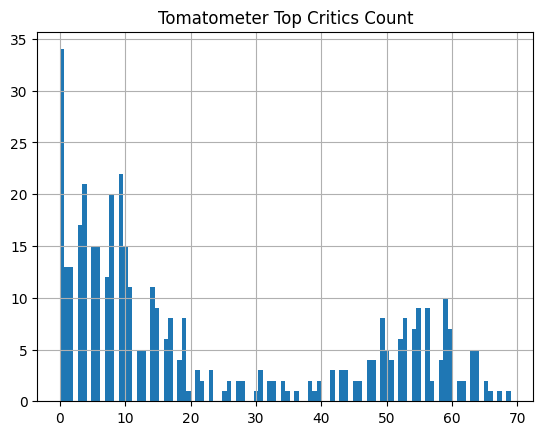

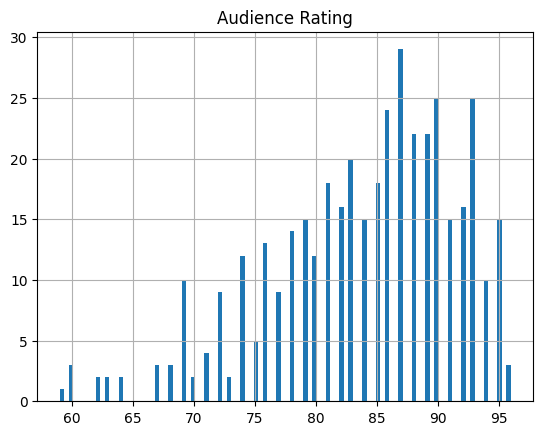

In [45]:
# создать гистограмму с отфильтрованным выбросом
for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

# 6. Заключение

[[<Axes: title={'center': 'IMDB Rating'}>]]


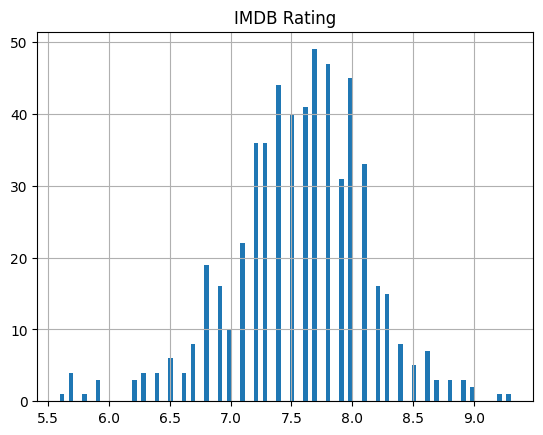

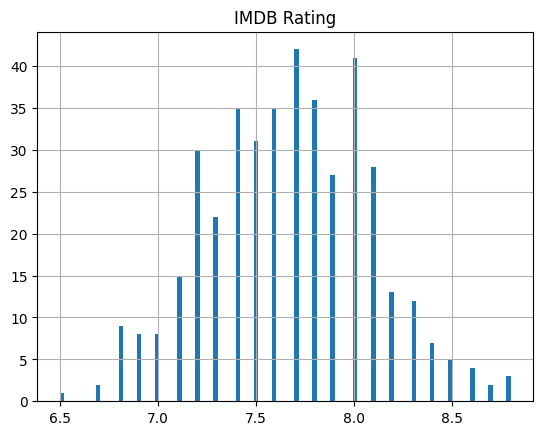

In [63]:
# IMDB рейтинг с выбросами и без них (гистограмма)
data.hist('IMDB Rating', bins=100);
print(data_filtered.hist('IMDB Rating', bins=100));

**Заключение:**

- На гистограмме без выбросов видно, что большая часть оценок IMDB распределена в диапазоне 6.5 - 9.0
- Большинство оценок находится в диапазоне 7.5 - 8.0
- Гистограмма соответствует нормальному распределению

[[<Axes: title={'center': 'Tomatometer Rating'}>]] [[<Axes: title={'center': 'Tomatometer Rating'}>]]


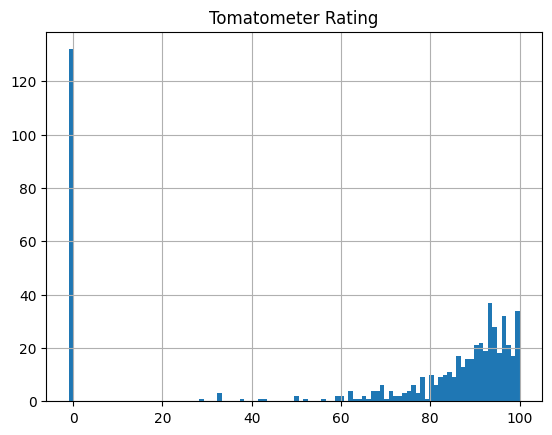

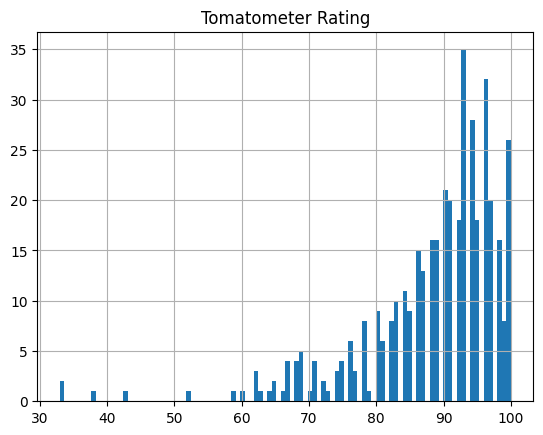

In [47]:
# Рейтинг томатометра с выбросами и без них (гистограмма)
print(data.hist('Tomatometer Rating', bins=100), data_filtered.hist('Tomatometer Rating', bins=100))

**Заключение:**

- Среднее значение по-прежнему выше медианного, поэтому гистограмма отображается вправо.
- Судя по гистограмме, средний рейтинг составляет 95-100 баллов

[[<Axes: title={'center': 'Tomatometer Top Critics Count'}>]]
[[<Axes: title={'center': 'Tomatometer Top Critics Count'}>]]


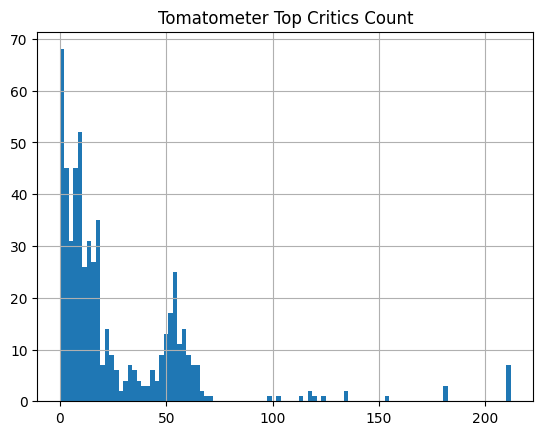

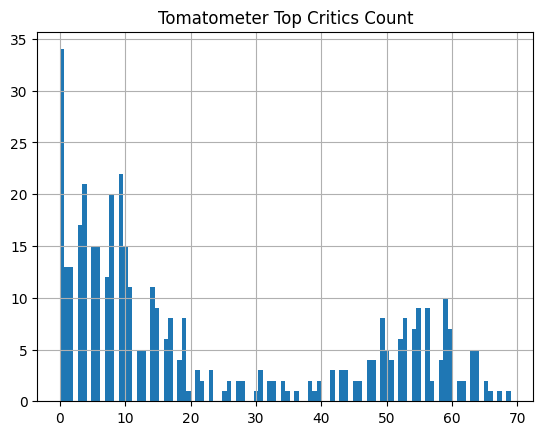

In [48]:
# Количество лучших критиков томатометра с выбросами и без них (гистограмма)
print(data.hist('Tomatometer Top Critics Count', bins=100))
print(data_filtered.hist('Tomatometer Top Critics Count', bins=100))

**Заключение:**

- Среднее значение числа топ-критиков рейтинга томатометра изменено с максимальных 200+ до 70.
- Самое встречаемое число топ-критиков, оценивающих фильм - 0. Значит, примерно 24 раза в датафрейме встречаются фильмы, не имеющие оценок топ-критиков.
- Среднее число топ-критиков варьируется от 0 до 10.
- Медианное значение сильно отличается от среднего.

[[<Axes: title={'center': 'Audience Rating'}>]]
[[<Axes: title={'center': 'Audience Rating'}>]]


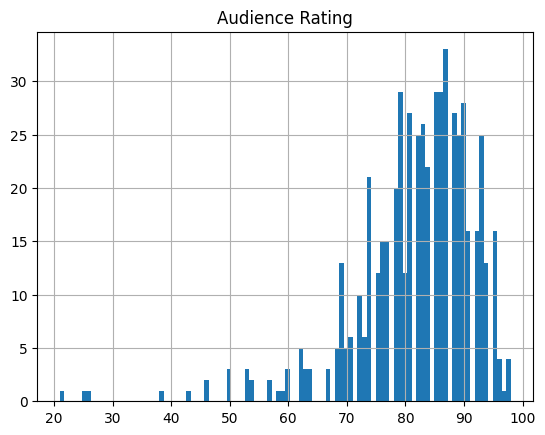

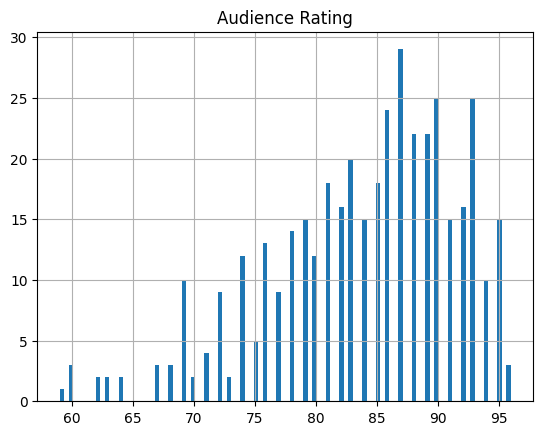

In [49]:
# Рейтинг зрителей с выбросами и без них (гистограмма)
print(data.hist('Audience Rating', bins=100))
print(data_filtered.hist('Audience Rating', bins=100))

**Заключение:**

- Рейтинговый выброс был уменьшен с минимального 20 до 60.
- Судя по гистограмме, средняя оценка аудитории находится приблизительно в диапазоне 85-93 баллов, а это значит, что небобщий рейтинг больше засчет оценки топ-критиков.

## 6.1. Зависимость получения премии "Оскар" от оценки разными системами рейтинга

In [50]:
won = data_filtered.query('Award == "Winner"')
nominated = data_filtered.query('Award == "Nominee"')

Исследуем оценки, получившие фильмы - победители премии "Оскар"

<Figure size 640x480 with 0 Axes>

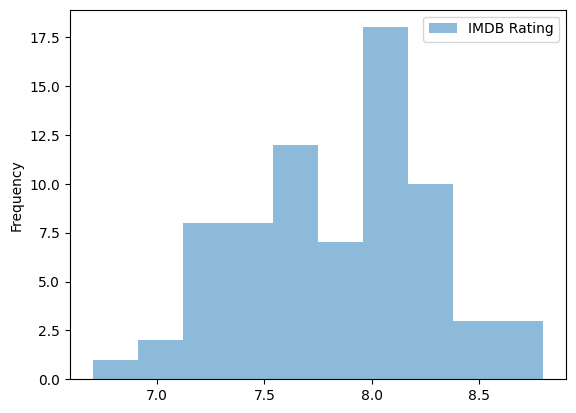

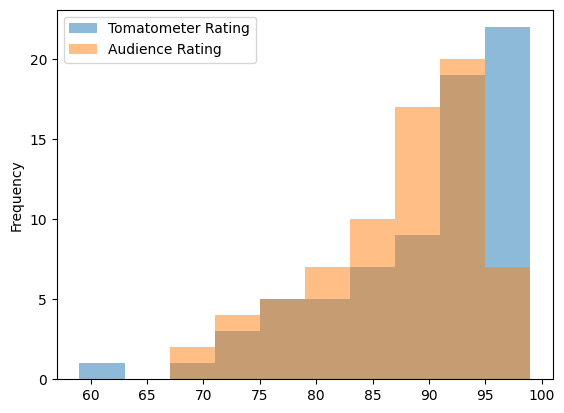

In [51]:
plt.figure();
won[['IMDB Rating']].plot.hist(alpha=0.5);
won[['Tomatometer Rating', 'Audience Rating']].plot.hist(alpha=0.5);

C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Winner')

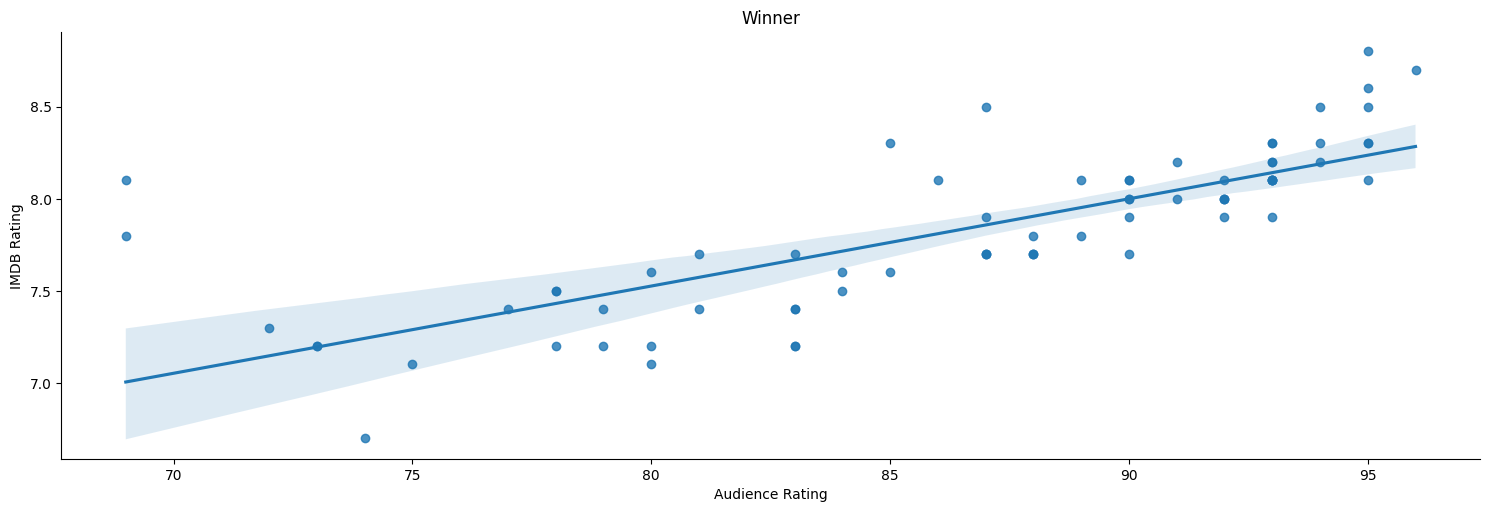

In [52]:
sns.lmplot(x="Audience Rating", y="IMDB Rating", data=won, height = 5, aspect =3)
plt.title('Winner')

In [53]:
won[['IMDB Rating','Tomatometer Rating', 'Audience Rating']].corr()

,IMDB Rating,Tomatometer Rating,Audience Rating
IMDB Rating,1.000000,0.261801,0.768314
Tomatometer Rating,0.261801,1.000000,0.280234
Audience Rating,0.768314,0.280234,1.000000


Исследуем оценки, получившие фильмы - победители премии "Оскар"

<Figure size 640x480 with 0 Axes>

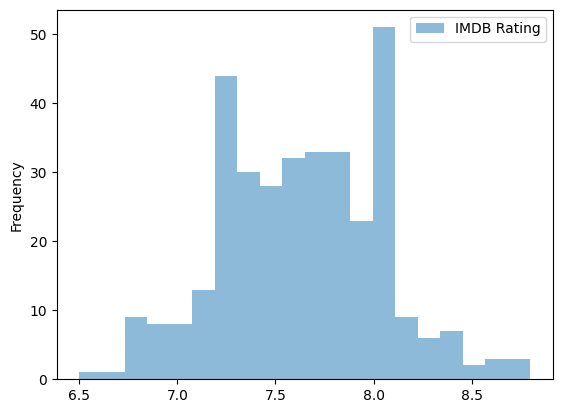

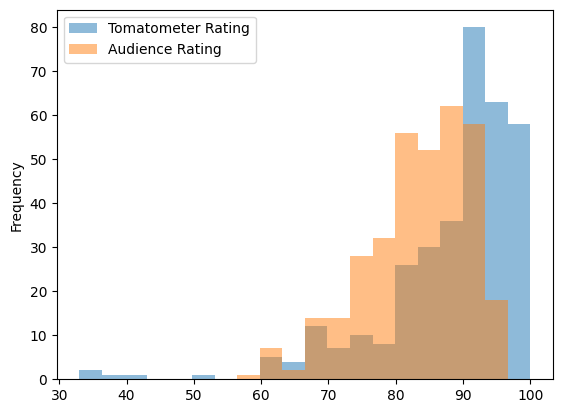

In [54]:
plt.figure();
nominated[['IMDB Rating']].plot.hist(alpha=0.5,  bins=20);
nominated[['Tomatometer Rating', 'Audience Rating']].plot.hist(alpha=0.5,  bins=20);

In [55]:
nominated[['IMDB Rating','Tomatometer Rating', 'Audience Rating']].corr()

,IMDB Rating,Tomatometer Rating,Audience Rating
IMDB Rating,1.000000,0.357772,0.845939
Tomatometer Rating,0.357772,1.000000,0.362572
Audience Rating,0.845939,0.362572,1.000000


In [56]:
nominated[['IMDB Rating','Tomatometer Rating', 'Audience Rating']].describe()

,IMDB Rating,Tomatometer Rating,Audience Rating
count,344.000000,344.000000,344.000000
mean,7.634593,88.203488,83.247093
std,0.408219,10.671309,7.754994
min,6.500000,33.000000,59.000000
25%,7.400000,84.000000,79.000000
50%,7.600000,91.000000,85.000000
75%,7.900000,95.250000,89.000000
max,8.800000,100.000000,96.000000


In [57]:
#table = pd.pivot_table(data_filtered, index=['Award'],columns=['IMDB Rating','Tomatometer Rating', 'Audience Rating'], aggfunc="mean")
# data_filtered.groupby('Award')['IMDB Rating','Tomatometer Rating', 'Audience Rating'].mean()
table = pd.DataFrame({
    'IMDB Rating': [won['IMDB Rating'].mean()*10, nominated['IMDB Rating'].mean()*10],
    'Tomatometer Rating': [ won['Tomatometer Rating'].mean(), nominated['Tomatometer Rating'].mean()],
    'Audience Rating': [ won['Audience Rating'].mean(), nominated['Audience Rating'].mean()]
}, index = ['Winner', 'Nominated'])

<Axes: >

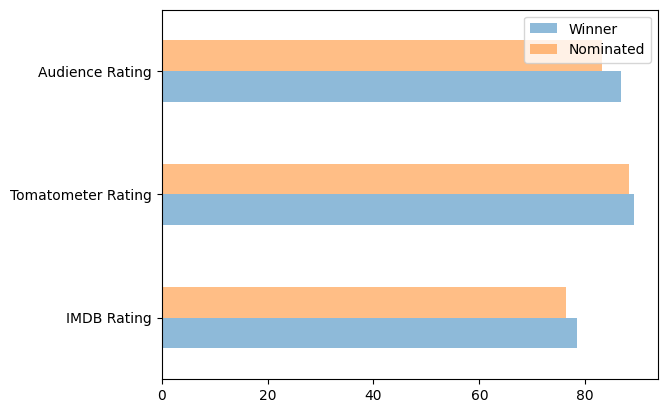

In [58]:
table.T.plot.barh(alpha = 0.5)

Оценка критиков не зависит от того, получит ли фильм премию "Оскар"

## 6.2. Кринж

? Оценка критиков Tomatometer самая высокая из всех 

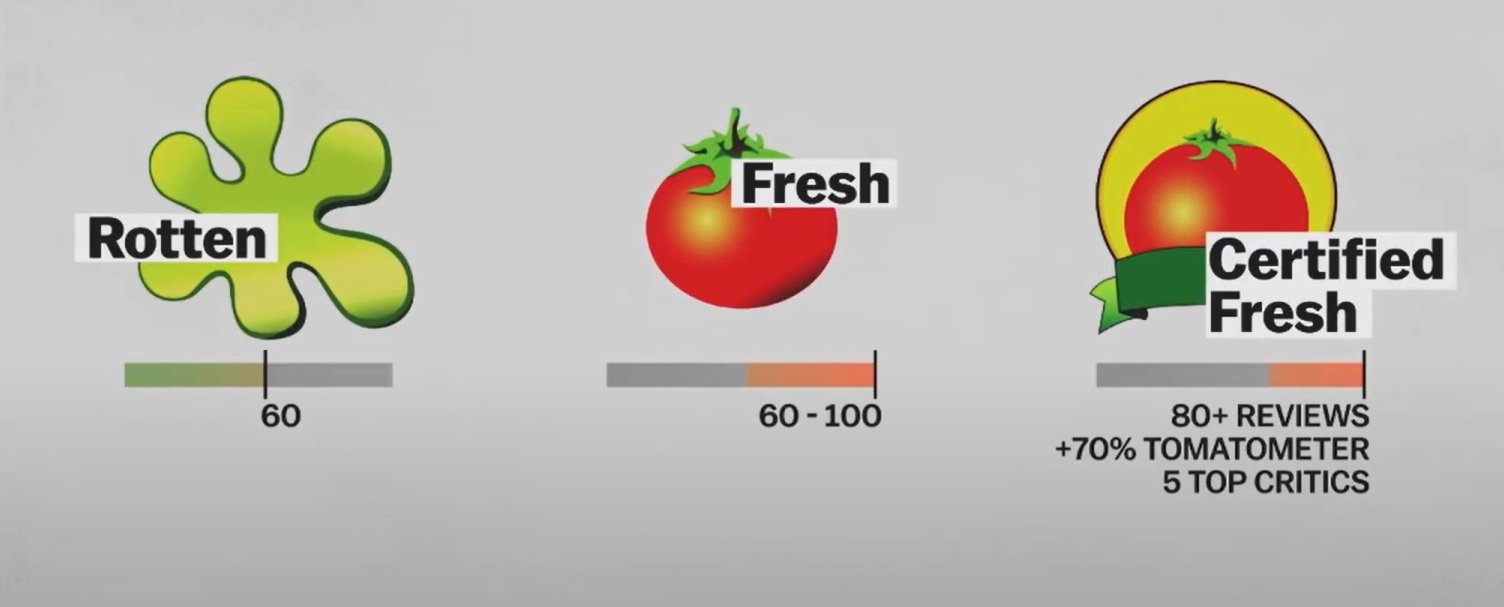

<Axes: title={'center': 'Tomatometer Rating'}, xlabel='Tomatometer Status'>

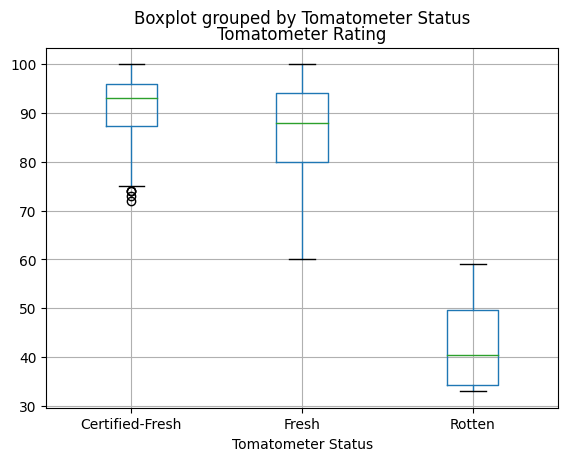

In [59]:
data_filtered.boxplot(by='Tomatometer Status', column = 'Tomatometer Rating', grid = True)

- Серединная оценка проверенной свежести и просто свежести примерно одинаковы (странно?). Значит ли это, что эти два статуса идентичны и тогда почему их разделяют?
- Фильмы, получившие статус гнилых, имеют рейтинг намного ниже, чем fresh.

Попробуем разобраться, почему так происходит...

<Axes: title={'center': 'Tomatometer Top Critics Count'}, xlabel='Tomatometer Status'>

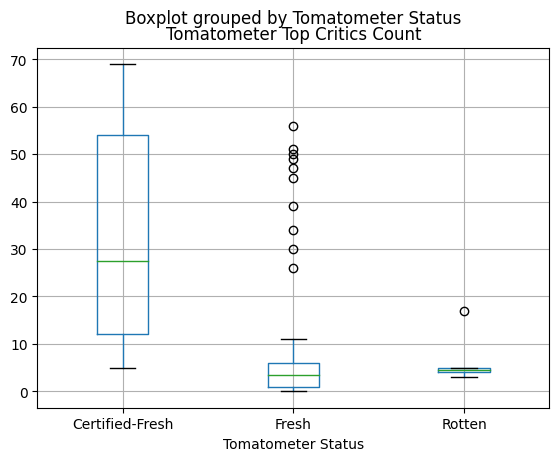

In [60]:
data_filtered.boxplot(by='Tomatometer Status', column = 'Tomatometer Top Critics Count', grid = True)

- Супер хорошие фильмы оценивает больше топ-критиков. Вероятно потому, что они от известных продюссеров и кино-компаний.
- Сайт специально дает топ-критикам для рецензии фильмы с большими рейтингами, чтобы они как раз и определили 'Sertified-Fresh' или просто 'Fresh', их мнение самое объективное из всех.

Отсюда выводы:
- Статус томатометра по большей мере определяют топ-критики
- Просто зрители в "Tomatometer Rating" намного лояльней и выше оценивают фильмы 